# Project: 🌈 Image Processing with NumPy — Color Channel Frequency Distribution

In this project, the NumPy library is used to analyze the frequency distribution (histogram) of pixel intensities in a colorful image—specifically, a rainbow photo. It shows how the red, green, and blue (RGB) color channels contribute to the image’s overall appearance. All computations are vectorized using NumPy, meaning no Python loops are required.

## Steps:

1. Load and Display the Rainbow Image
2. Extract RGB Channels
3. Visualize each channel
4. Compute Frequency Distributions
5. Visualize the Color Channel Distributions
6. Normalize Histograms for Comparison
7. Compute Summary Statistics

## Files: 

- Image_processing_with_numpy.ipynb
- rainbow.png



In [1]:
# Import packages and libraries

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

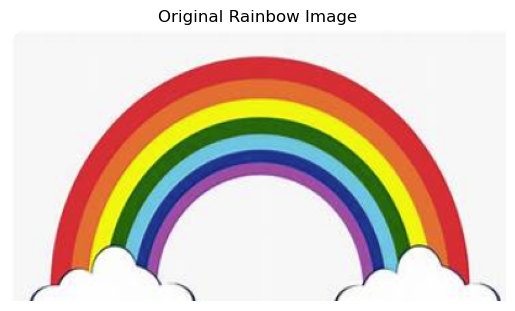

Image shape: (220, 402, 3)
Data type: uint8


In [2]:
# Load rainbow image

img = Image.open("rainbow.png").convert("RGB")

# Convert to NumPy array

img_np = np.array(img)

# Display the image

plt.imshow(img_np)
plt.title("Original Rainbow Image")
plt.axis("off")
plt.show()

# Show array details

print("Image shape:", img_np.shape)
print("Data type:", img_np.dtype)


###  Explanation:

- The image is converted into a **NumPy array** of shape `(220, 402, 3)` — representing Red, Green, and Blue channels.  
- Each pixel intensity is an integer between **0–255**.  
- NumPy allows vectorized access and arithmetic operations across these channels.

In [3]:
# Extract RGB channels

red_channel   = img_np[:, :, 0]  # Red
green_channel = img_np[:, :, 1]  # Green
blue_channel  = img_np[:, :, 2]  # Blue


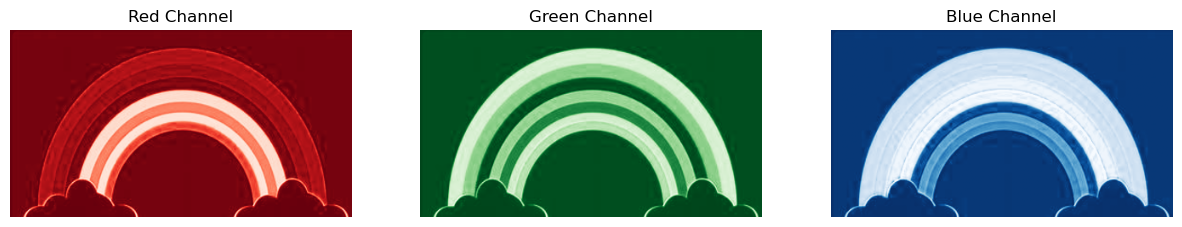

In [4]:
# Visualize each channel

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].imshow(red_channel, cmap='Reds')
ax[0].set_title('Red Channel')
ax[1].imshow(green_channel, cmap='Greens')
ax[1].set_title('Green Channel')
ax[2].imshow(blue_channel, cmap='Blues')
ax[2].set_title('Blue Channel')
for a in ax: a.axis('off')
plt.show()


###  Explanation:

- The slice of 3D array along the third axis to isolate each color channel.  
- The resulting arrays each represent the **intensity map** of one color.  
- The brightness in each image corresponds to how strong that color is at that pixel.

In [5]:
# Compute frequency distributions using np.bincount
# Compute how many pixels have a given intensity (0–255) for each color channel using NumPy’s vectorized counting.

red_hist   = np.bincount(red_channel.flatten(), minlength=256)
green_hist = np.bincount(green_channel.flatten(), minlength=256)
blue_hist  = np.bincount(blue_channel.flatten(), minlength=256)


###  Explanation:

- `.flatten()` converts the 2D pixel grid into a 1D array.  
- `np.bincount()` counts how many times each intensity value (0–255) occurs.  
- `minlength=256` ensures all intensity bins exist.  
- The result: three arrays, each representing a histogram for a color channel.

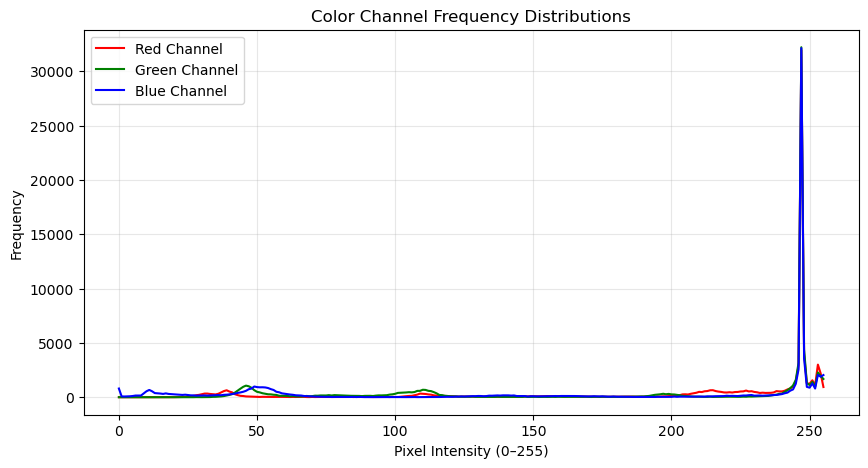

In [6]:
# Visualize the Color Channel Distributions

plt.figure(figsize=(10,5))
plt.plot(red_hist, color='red', label='Red Channel')
plt.plot(green_hist, color='green', label='Green Channel')
plt.plot(blue_hist, color='blue', label='Blue Channel')
plt.title("Color Channel Frequency Distributions")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


###  Explanation:

- Each curve shows how frequently a particular brightness occurs for each color.  
- For a rainbow, we expect all three channels to have **diverse distributions** — since the image covers a wide color range.


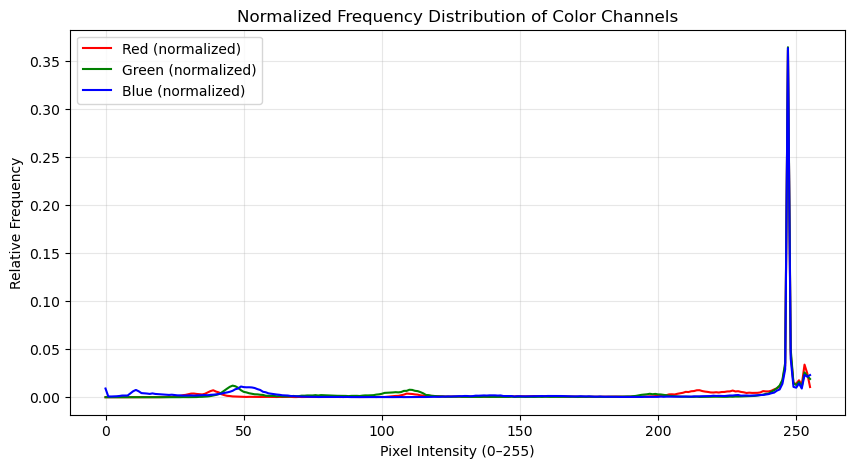

In [9]:
# Normalize Histograms for Comparison
# This converts absolute counts into relative frequencies (probability distributions).

red_norm   = red_hist / red_hist.sum()
green_norm = green_hist / green_hist.sum()
blue_norm  = blue_hist / blue_hist.sum()

plt.figure(figsize=(10,5))
plt.plot(red_norm, color='red', label='Red (normalized)')
plt.plot(green_norm, color='green', label='Green (normalized)')
plt.plot(blue_norm, color='blue', label='Blue (normalized)')
plt.title("Normalized Frequency Distribution of Color Channels")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Relative Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

###  Explanation:

- Dividing each histogram by the total number of pixels yields a **probability distribution**.  
- This normalization allows direct comparison between different images or channels.  
- It also forms the basis for algorithms like **histogram equalization** and **image matching**.

In [11]:
# Compute Summary Statistics
# Quantify color balance using NumPy’s built-in statistical functions.

for color, channel in zip(["Red", "Green", "Blue"], [red_channel, green_channel, blue_channel]):
    print(f"{color} Channel → mean: {channel.mean():.2f}, std: {channel.std():.2f}")

Red Channel → mean: 214.91, std: 62.44
Green Channel → mean: 195.24, std: 77.05
Blue Channel → mean: 179.64, std: 93.09


###  Explanation:

- **Mean** → average brightness of each channel.  
- **Standard deviation** → how much the brightness varies across the image.  
- For a rainbow, each channel should have relatively high mean and variance since the image spans multiple bright colors.

###  Results:

- NumPy enables **vectorized numerical operations** — ideal for image analysis.  
- Histograms are powerful tools for understanding image color composition.  
- This approach is the foundation for **image enhancement**, **color correction**, and **machine learning preprocessing**.

### Future scope:

- Implement **Histogram Equalization** to enhance contrast.  
- Compare multiple images using their color distributions.  
- Build a simple color-based image classifier using histogram features.
